In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from matplotlib.collections import LineCollection, PolyCollection
from matplotlib.lines import TICKLEFT, TICKRIGHT, Line2D
from matplotlib.patches import Rectangle
from matplotlib.transforms import Affine2D
from six.moves import xrange, zip
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)


In [25]:
df =pd.read_csv('ACC.csv')
df['Date']=pd.to_datetime(df['Date'])
df=df.head(20)
df=df.rename(columns={'Date':'d','Open Price':'o',
                    'High Price':'h',
                    'Low Price':'l',
                    'Close Price':'c'})         

In [26]:
x=np.arange(0,len(df))

<function matplotlib.pyplot.show(close=None, block=None)>

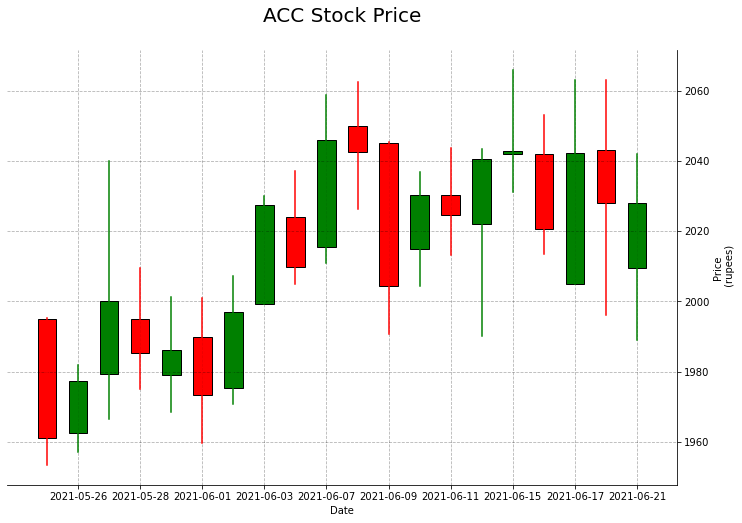

In [42]:
fig, ax = plt.subplots(1, figsize=(12,8))
lines = []
patches = []

for i in x:
    if df['c'][i] >=df['o'][i]:
        color = 'g'
        lower = df['o'][i]
        height = df['c'][i] - df['o'][i]
    else:
        color = 'r'
        lower = df['c'][i]
        height = df['o'][i] - df['c'][i]

    vline = Line2D(xdata=(i, i), ydata=(df['l'][i],df['h'][i]),color=color)

    rect = Rectangle(xy=(i-0.3,lower),width=0.6,height=height,facecolor=color,edgecolor='k')
    rect.set_alpha(alpha=1.0)

    lines.append(vline)
    patches.append(rect)
    ax.add_line(vline)
    ax.add_patch(rect)
    ax.autoscale_view()
    
# ticks top plot
ax.set_xticks(x[::2])
ax.set_xticklabels(df.d.dt.date[::2])
ax.invert_xaxis()
ax.yaxis.tick_right()

# labels
ax.yaxis.set_label_position("right")
ax.set_ylabel('Price\n (rupees)',color='k',fontsize=10)
ax.set_xlabel('Date',color='k',fontsize=10)

# grid
ax.xaxis.grid(color='black', linestyle='dashed', alpha=0.3)
ax.yaxis.grid(color='black', linestyle='dashed', alpha=0.3)
  
# remove spines
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

# title
ax.set_title('ACC Stock Price\n', loc='center', fontsize=20)

plt.show